# 0.0 - Imports

In [2]:
import math
import numpy as np
import pandas as pd
import inflection
import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML

## 0.1 - Helper Functions

In [3]:
def jupyter_settings():
    plt.style.use("bmh")
    plt.rcParams["figure.figsize"] = [25, 12]
    plt.rcParams["font.size"] = 24

    display(HTML("<style>.container { width:100% !important; }</style>"))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option("display.expand_frame_repr", False)

    sns.set()

In [4]:
jupyter_settings()

## 0.2 - Load Data

In [5]:
df_sales_raw = pd.read_csv("../data/raw/train.csv", low_memory=False)
df_store_raw = pd.read_csv("../data/raw/store.csv", low_memory=False)

# Merging datasets
df_raw = pd.merge(df_sales_raw, df_store_raw, how="left", on="Store")

df_raw.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
88835,751,3,2015-05-13,4440,662,1,0,0,0,a,a,650.0,10.0,2006.0,0,NaN,NaN,NaN
17890,51,3,2015-07-15,7522,505,1,1,0,0,a,c,10570.0,7.0,2013.0,1,9.0,2011.0,"Jan,Apr,Jul,Oct"
7090,401,6,2015-07-25,3299,263,1,0,0,0,a,c,9200.0,10.0,2009.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct"
560292,233,5,2014-02-14,8784,1035,1,0,0,0,a,a,1890.0,NaN,NaN,0,NaN,NaN,NaN
911075,906,6,2013-04-06,9066,1131,1,0,0,0,a,a,90.0,7.0,2010.0,0,NaN,NaN,NaN


## 0.3 - Split Data

In [6]:
# Split dataset into train, test and validation
train, test = train_test_split(
    df_raw, test_size=0.2, random_state=42
)

In [7]:
train.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1015962,983,3,2013-01-02,12003,1811,1,0,0,1,a,a,40.0,3.0,2014.0,1,1.0,2014.0,"Jan,Apr,Jul,Oct"
563271,982,3,2014-02-12,5947,564,1,0,0,0,d,a,21930.0,NaN,NaN,0,NaN,NaN,NaN
705538,529,1,2013-10-07,9610,910,1,1,0,1,d,c,12920.0,9.0,2012.0,0,NaN,NaN,NaN
286466,635,6,2014-11-08,2179,213,1,0,0,0,a,a,27530.0,4.0,2014.0,0,NaN,NaN,NaN
309275,1074,3,2014-10-15,4120,455,1,0,0,0,c,c,3330.0,10.0,2001.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


# 1.0 - Data Description

In [8]:
# Creating dataset copy
df1 = train.copy()

In [9]:
df1.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
496772,268,6,2014-04-12,3257,438,1,0,0,1,a,a,4520.0,2.0,2014.0,0,NaN,NaN,NaN
267612,450,5,2014-11-28,12255,1280,1,1,0,0,c,a,5780.0,11.0,1994.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
232376,457,7,2015-01-04,0,0,0,0,0,0,d,c,13140.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
889793,809,4,2013-04-25,9837,842,1,1,0,0,a,a,12770.0,10.0,2000.0,0,NaN,NaN,NaN
139122,863,7,2015-03-29,1771,206,1,0,0,0,a,c,21370.0,11.0,2010.0,0,NaN,NaN,NaN


In [10]:
type(df1)

pandas.core.frame.DataFrame

## 1.1 - Rename Columns

In [11]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [12]:
# Putting columns names on list
cols_old = list(df1)

# Function from rename
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

# Renaming columns
df1.columns = cols_new

# New columns names
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 - Data Dimension 

In [13]:
# Number of Rows and Columns
print(f"Number of Rows: {df1.shape[0]}")
print(f"Number of Columns: {df1.shape[1]}")

Number of Rows: 813767
Number of Columns: 18


## 1.3 - Check Data Types 

In [14]:
# Changing Date Type
df1["date"] = pd.to_datetime(df1["date"])

# Checking types
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 - Check NA's 

In [15]:
# Checking sum of Na's
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2121
competition_open_since_month    258609
competition_open_since_year     258609
promo2                               0
promo2_since_week               406225
promo2_since_year               406225
promo_interval                  406225
dtype: int64

## 1.5 - Fillout NA

In [16]:
# competition_distance
df1["competition_distance"] = df1["competition_distance"].apply(
    lambda x: 200000.0 if math.isnan(x) else x
)
# competition_open_since_month
df1["competition_open_since_month"] = df1.apply(
    lambda x: x["date"].month
    if math.isnan(x["competition_open_since_month"])
    else x["competition_open_since_month"],
    axis=1,
)
# competition_open_since_year
df1["competition_open_since_year"] = df1.apply(
    lambda x: x["date"].year
    if math.isnan(x["competition_open_since_year"])
    else x["competition_open_since_year"],
    axis=1,
)
# promo2_since_week
df1["promo2_since_week"] = df1.apply(
    lambda x: x["date"].week
    if math.isnan(x["promo2_since_week"])
    else x["promo2_since_week"],
    axis=1,
)
# promo2_since_year
df1["promo2_since_year"] = df1.apply(
    lambda x: x["date"].year
    if math.isnan(x["promo2_since_year"])
    else x["promo2_since_year"],
    axis=1,
)
# promo_interval
month_map = {
    1: "Jan",
    2: "Fev",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}
df1["promo_interval"].fillna(0, inplace=True)
df1["month_map"] = df1["date"].dt.month.map(month_map)
df1["is_promo"] = df1[["promo_interval", "month_map"]].apply(
    lambda x: 0
    if x["promo_interval"] == 0
    else 1
    if x["month_map"] in x["promo_interval"].split(",")
    else 0,
    axis=1,
)

In [17]:
df1.sample(5).transpose()

,727220,183544,556285,320133,90419
store,1026,685,686,647,105
day_of_week,3,2,2,5,1
date,2013-09-18 00:00:00,2015-02-17 00:00:00,2014-02-18 00:00:00,2014-10-03 00:00:00,2015-05-11 00:00:00
sales,5871,8209,8114,0,5119
customers,852,680,934,0,657
open,1,1,1,0,1
promo,0,1,1,1,0
state_holiday,0,0,0,a,0
school_holiday,0,0,1,0,0
store_type,c,a,a,a,a


## 1.6 - Change Types

In [18]:
df1["competition_open_since_month"] = df1["competition_open_since_month"].astype(int)
df1["competition_open_since_year"] = df1["competition_open_since_year"].astype(int)

df1["promo2_since_week"] = df1["promo2_since_week"].astype(int)
df1["promo2_since_year"] = df1["promo2_since_year"].astype(int)

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [19]:
type(df1)

pandas.core.frame.DataFrame

## 1.7 - Descriptive Statistics

In [20]:
# Separating numeric from categorical variables
num_attributes = df1.select_dtypes(include=["int64", "float64"])
cat_attributes = df1.select_dtypes(exclude=["int64", "float64", "datetime64[ns]"])

cat_attributes.sample(5)

,state_holiday,store_type,assortment,promo_interval,month_map
669436,0,a,a,0,Nov
302053,0,a,a,"Jan,Apr,Jul,Oct",Oct
914152,0,d,a,0,Apr
875541,0,a,c,"Feb,May,Aug,Nov",May
692191,0,b,c,0,Oct


### 1.7.1 - Numerical Attributes

In [21]:
# Central tendencies, mean and median
ct_mean = pd.DataFrame(num_attributes.apply(np.mean)).T
ct_median = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion, std, min, max, range, skew and kurtosis
d_std = pd.DataFrame(num_attributes.apply(np.std)).T
d_min = pd.DataFrame(num_attributes.apply(min)).T
d_max = pd.DataFrame(num_attributes.apply(max)).T
d_range = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d_skew = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d_kurtosis = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat(
    [d_min, d_max, d_range, ct_mean, ct_median, d_std, d_skew, d_kurtosis]
).T.reset_index()
m.columns = [
    "features",
    "min",
    "max",
    "range",
    "mean",
    "median",
    "std",
    "skew",
    "kurtosis",
]
m

,features,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.474664,558.0,321.932550,-0.001268,-1.200817
1,day_of_week,1.0,7.0,6.0,3.997424,4.0,1.997240,0.002528,-1.246598
2,sales,0.0,38484.0,38484.0,5774.678544,5743.0,3850.999027,0.642493,1.779641
3,customers,0.0,5494.0,5494.0,633.167813,609.0,464.288732,1.591929,7.016471
4,open,0.0,1.0,1.0,0.830206,1.0,0.375452,-1.758980,1.094014
5,promo,0.0,1.0,1.0,0.381462,0.0,0.485745,0.488068,-1.761794
6,school_holiday,0.0,1.0,1.0,0.178980,0.0,0.383336,1.674880,0.805227
7,competition_distance,20.0,200000.0,199980.0,5932.285863,2330.0,12561.526589,10.244982,147.667350
8,competition_open_since_month,1.0,12.0,11.0,6.788845,7.0,3.310236,-0.042409,-1.231626
9,competition_open_since_year,1900.0,2015.0,115.0,2010.319596,2012.0,5.520914,-7.219063,123.468346


/tmp/ipykernel_41684/710812770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['sales'])


<Axes: xlabel='sales', ylabel='Density'>

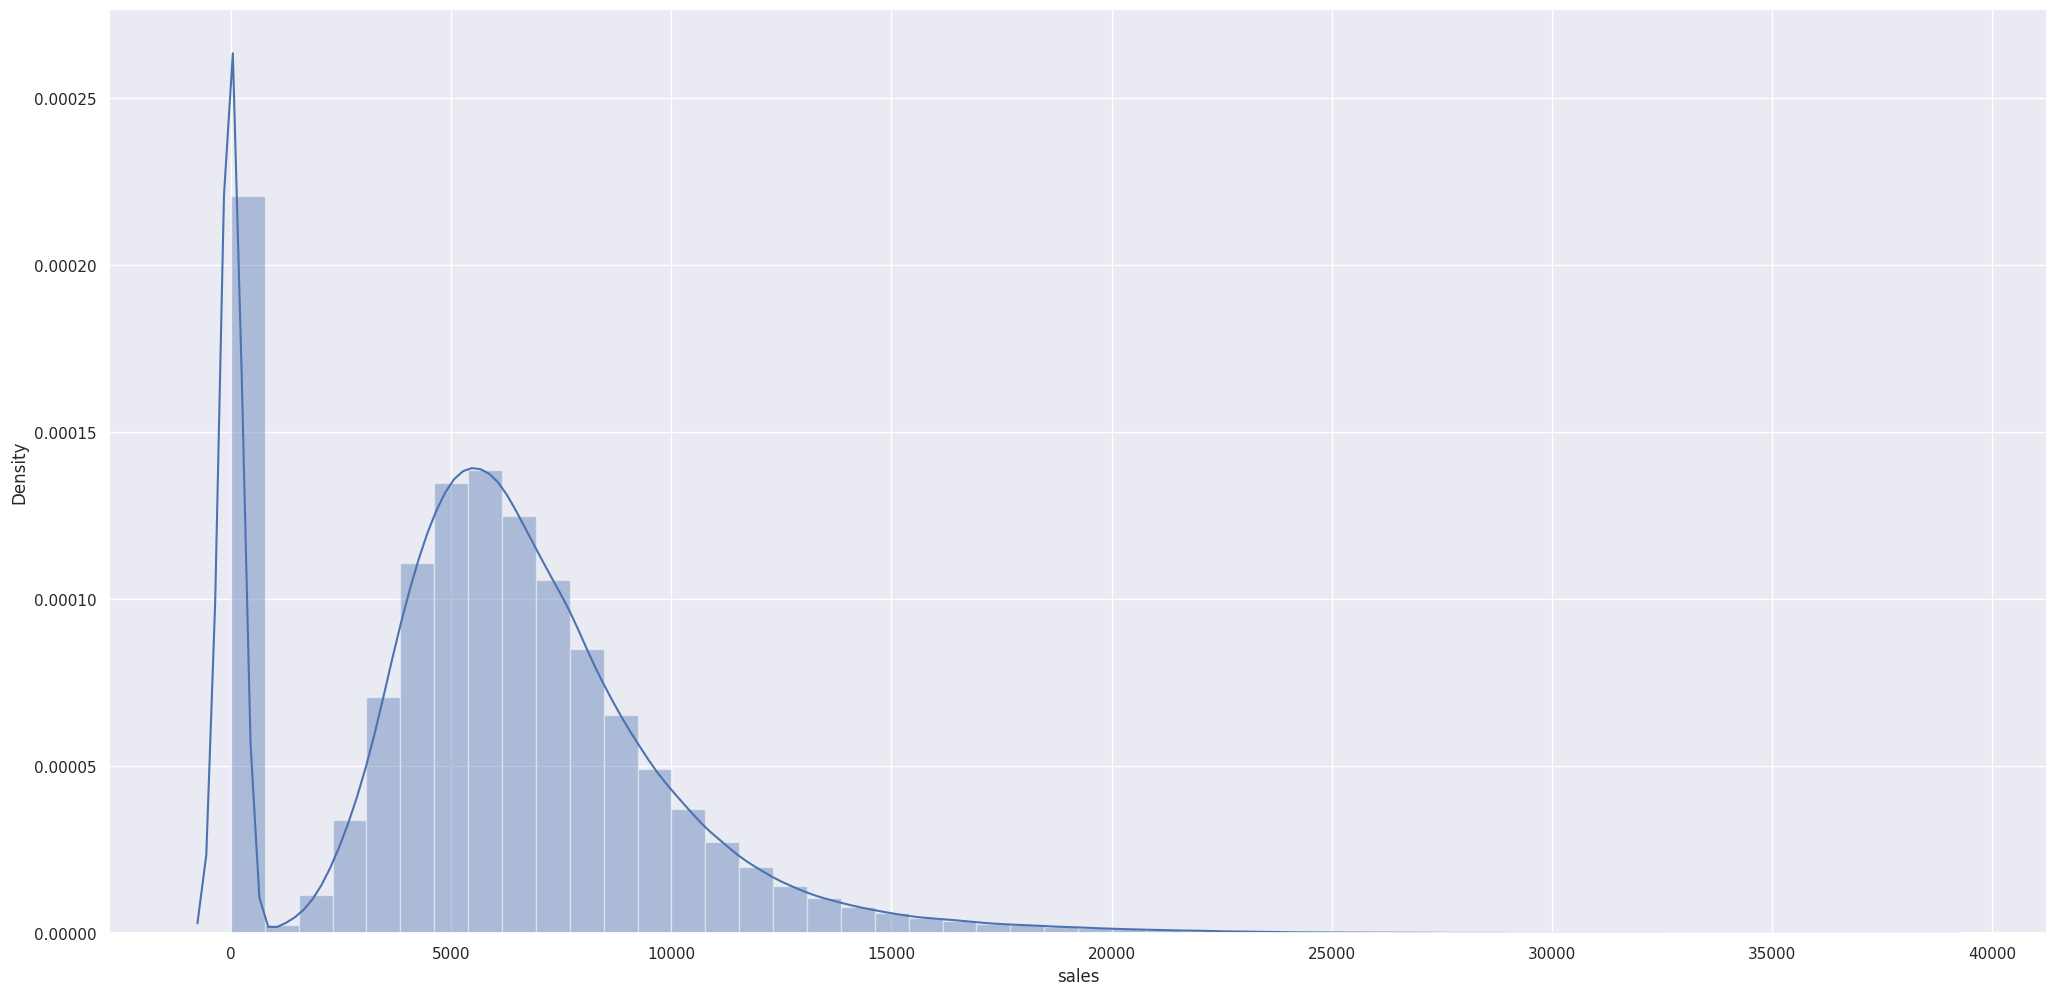

In [22]:
sns.distplot(df1['sales'])

/tmp/ipykernel_41684/4234290159.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["competition_distance"])


<Axes: xlabel='competition_distance', ylabel='Density'>

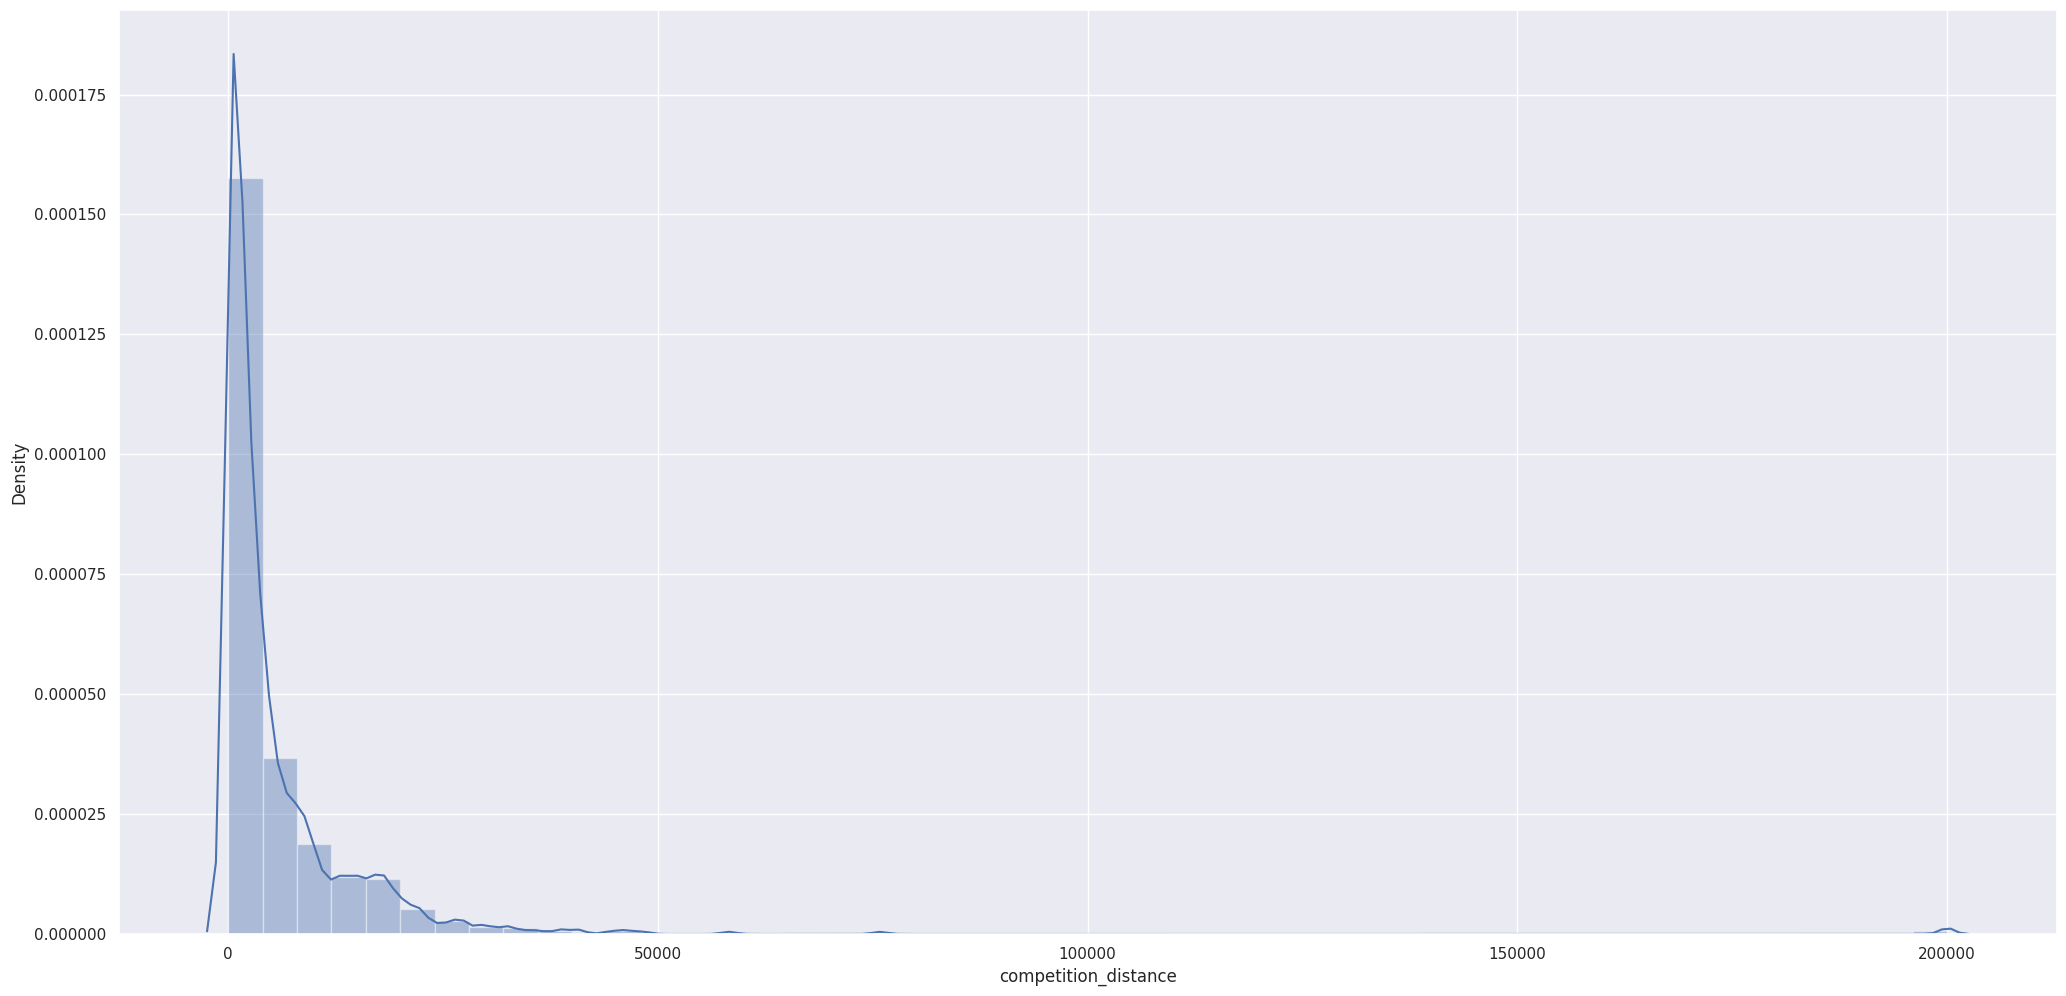

In [23]:
sns.distplot(df1["competition_distance"])

### 1.7.2 - Categorical Attributes

In [24]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

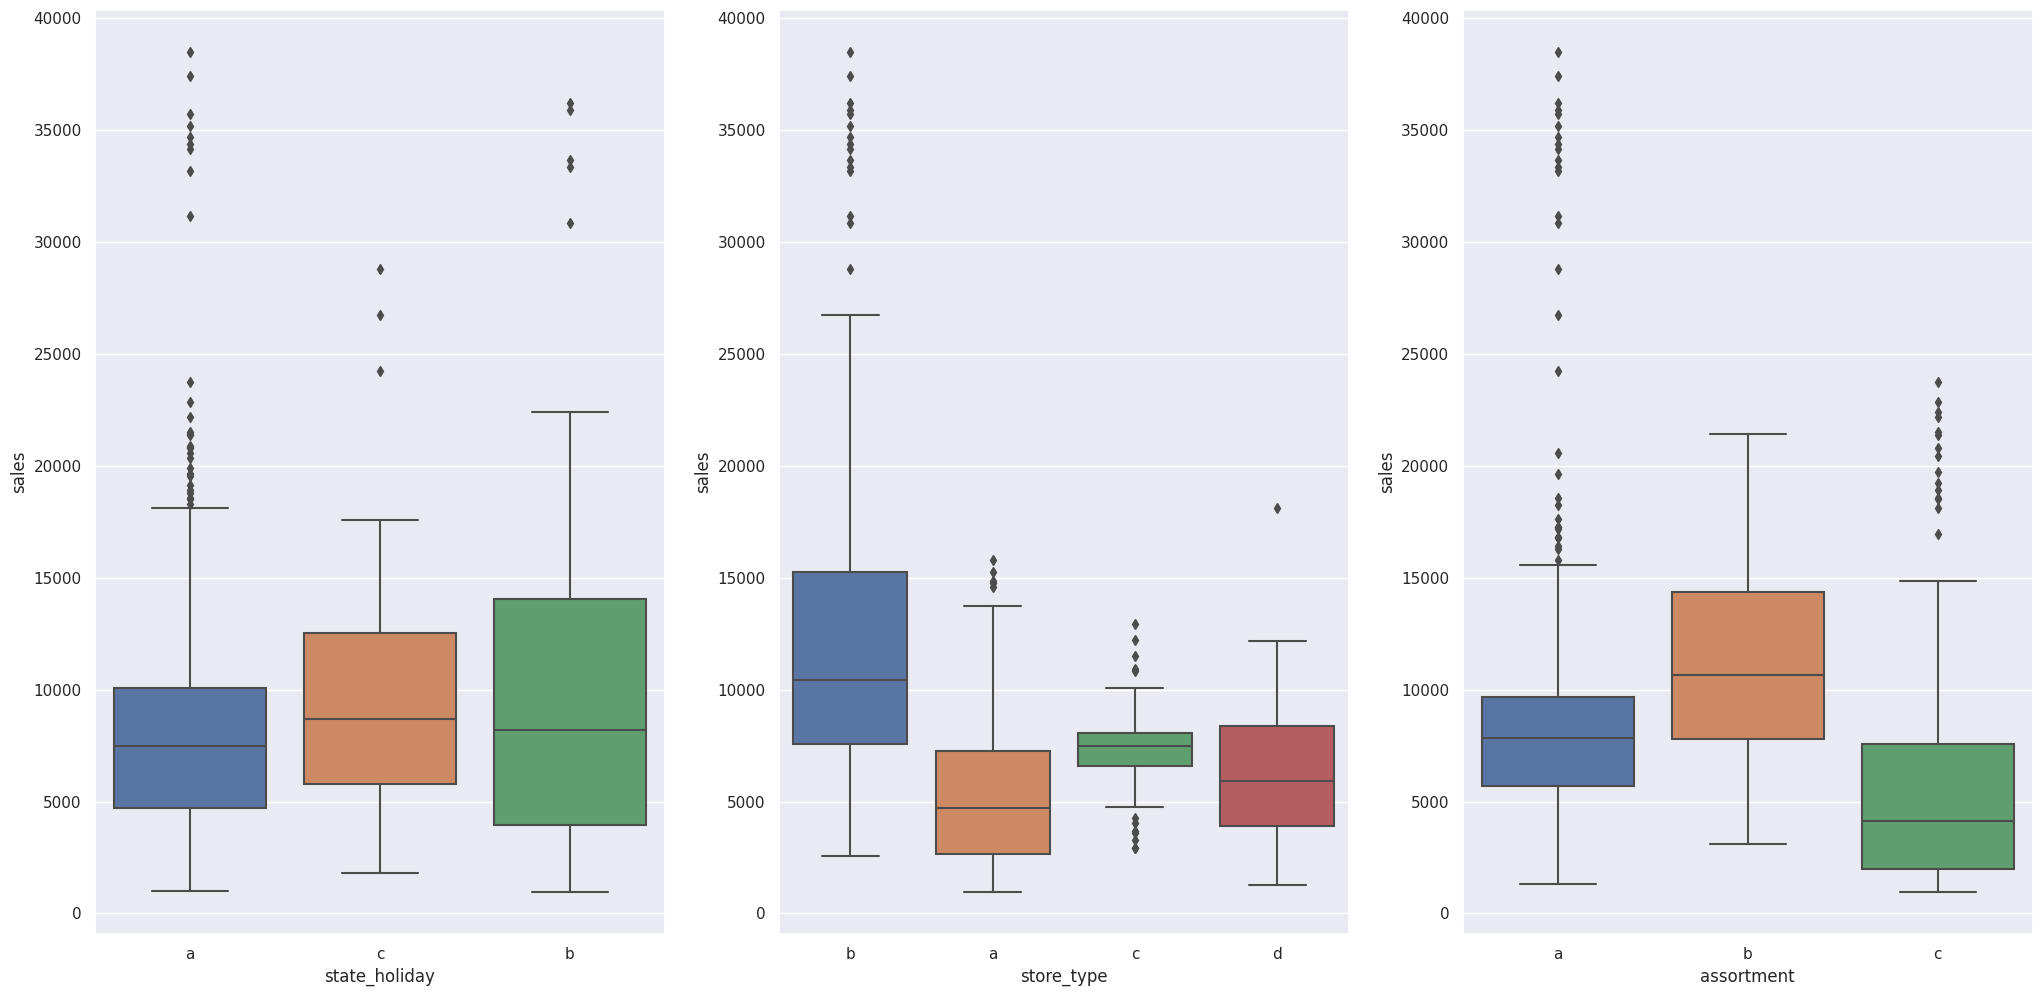

In [25]:
filters = (df1["state_holiday"] != "0") & (df1["sales"] > 0)
aux = df1.loc[filters, :]

plt.subplot(1, 3, 1)
sns.boxplot(x="state_holiday", y="sales", data=aux)
plt.subplot(1, 3, 2)
sns.boxplot(x="store_type", y="sales", data=aux)
plt.subplot(1, 3, 3)
sns.boxplot(x="assortment", y="sales", data=aux)

# 2.0 - Feature Engineering

In [26]:
df2 = df1.copy()

## 2.1 - Mapa Mental de Hipóteses

```mermaid
mindmap
    [Daily Stores Sales]
        )Cliente(
            Volume de Compra
            Número de Filhos
            Salário
            Idade
            Profissão
            Família
            Frequência de Compra
        )Localização(
            Perto de Escola
            Bairro
            Rural
            Urbano
            Centro
            Perto de Hospital
        )Temporal(
            Feriados
            Semana do Ano
            Dia
            Mês
            Ano
            Hora
            Fim de Semana
            Saldão
        )Lojas(
            Número de Funcionários
            Estoque
            Tamanho
            Sortimento
            Competidores
        )Produtos(
            Marketing
            Exposição na Loja
            Preço
            Estoque
            Promoção
```

## 2.2 - Criação de Hipóteses

### 2.2.1 - Hipóteses de **Loja**

**1.** Lojas com número maior de funcionários deveriam vender mais.  
**2.** Lojas com maior capacidade de estoque deveriam vender mais.  
**3.** Lojas com maior porte deveriam vender mais.  
**4.** Lojas com maior sortimentos deveriam vender mais.  
**5.** Lojas com competidores mais próximos deveriam vender menos.  
**6.** Lojas com competidores à mais tempo deveriam vendem mais.  

### 2.2.2 - Hipóteses de **Produto**

**1.** Lojas que investem mais em Marketing deveriam vender mais.  
**2.** Lojas com maior exposição de produto deveriam vender mais.  
**3.** Lojas com produtos com preço menor deveriam vender mais.  
**5.** Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais.  
**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.  
**7.** Lojas com mais dias de promoção deveriam vender mais.  
**8.** Lojas com mais promoções consecutivas deveriam vender mais.  

### 2.2.3 - Hipóteses de **Tempo**

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.  
**2.** Lojas deveriam vender mais ao longo dos anos.  
**3.** Lojas deveriam vender mais no segundo semestre do ano.  
**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.  
**5.** Lojas deveriam vender menos aos finais de semana.  
**6.** Lojas deveriam vender menos durante os feriados escolares.  

## 2.3 - Lista Final de Hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais.  
**2.** Lojas com competidores mais próximos deveriam vender menos.  
**3.** Lojas com competidores à mais tempo deveriam vendem mais.  
**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.  
**5.** Lojas com mais dias de promoção deveriam vender mais.  
**6.** Lojas com mais promoções consecutivas deveriam vender mais.  
**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.  
**8.** Lojas deveriam vender mais ao longo dos anos.  
**9**. Lojas deveriam vender mais no segundo semestre do ano.  
**10**. Lojas deveriam vender mais depois do dia 10 de cada mês.  
**11**. Lojas deveriam vender menos aos finais de semana.  
**12**. Lojas deveriam vender menos durante os feriados escolares.  

## 2.4 - Feature Engineering

In [27]:
# Creating datetimes

# Year
df2["year"] = df2["date"].dt.year

# Month
df2["month"] = df2["date"].dt.month

# Week of Year
df2["week_of_year"] = df2["date"].dt.isocalendar().week

# Year Week
df2["year_week"] = df2["date"].dt.strftime("%Y-%W")

In [28]:
# Competition Since
df2["competition_since"] = df2.apply(
    lambda x: datetime.datetime(
        year=x["competition_open_since_year"],
        month=x["competition_open_since_month"],
        day=1,
    ),
    axis=1,
)
df2["competition_time_month"] = (
    ((df2["date"] - df2["competition_since"]) / 30).apply(lambda x: x.days).astype(int)
)

In [29]:
# Promo Since
df2["promo_since"] = (
    df2["promo2_since_year"].astype(str) + "-" + df2["promo2_since_week"].astype(str)
)
df2["promo_since"] = df2["promo_since"].apply(
    lambda x: datetime.datetime.strptime(x + "-1", "%Y-%W-%w")
    - datetime.timedelta(days=7)
)
df2["promo_time_week"] = (
    ((df2["date"] - df2["promo_since"]) / 7).apply(lambda x: x.days).astype(int)
)

In [30]:
# Assortment
df2["assortment"] = df2["assortment"].apply(
    lambda x: "basic" if x == "a" else "extra" if x == "b" else "extended"
)

# State Holiday
df2["state_holiday"] = df2["state_holiday"].apply(
    lambda x: "public_holiday"
    if x == "a"
    else "easter_holiday"
    if x == "b"
    else "christmas"
    if x == "c"
    else "regular_day"
)

In [31]:
df2.sample(5).T

,886438,716087,974987,181379,268442
store,799,1043,148,750,330
day_of_week,7,6,4,4,4
date,2013-04-28 00:00:00,2013-09-28 00:00:00,2013-02-07 00:00:00,2015-02-19 00:00:00,2014-11-27 00:00:00
sales,0,9158,8580,5462,5134
customers,0,1382,805,417,489
open,0,1,1,1,1
promo,0,0,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,0,0,1,1,0
store_type,a,c,a,d,a


# 3.0 - Filtragem de Variáveis

In [32]:
df3 = df2.copy()

## 3.1 - Filtragem de Linhas

In [33]:
df3 = df3.loc[(df3['open'] != 0) & (df3['sales'] > 0), :]

## 3.2 - Filtragem de Colunas

In [34]:
df3 = df3.drop(['customers', 'open', 'promo_interval', 'month_map'], axis=1)
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0 - Análise Exploratória de Dados (EDA)

In [35]:
df4 = df3.copy()

## 4.1 - Análise Univariada

### 4.1.1 - Variável Resposta

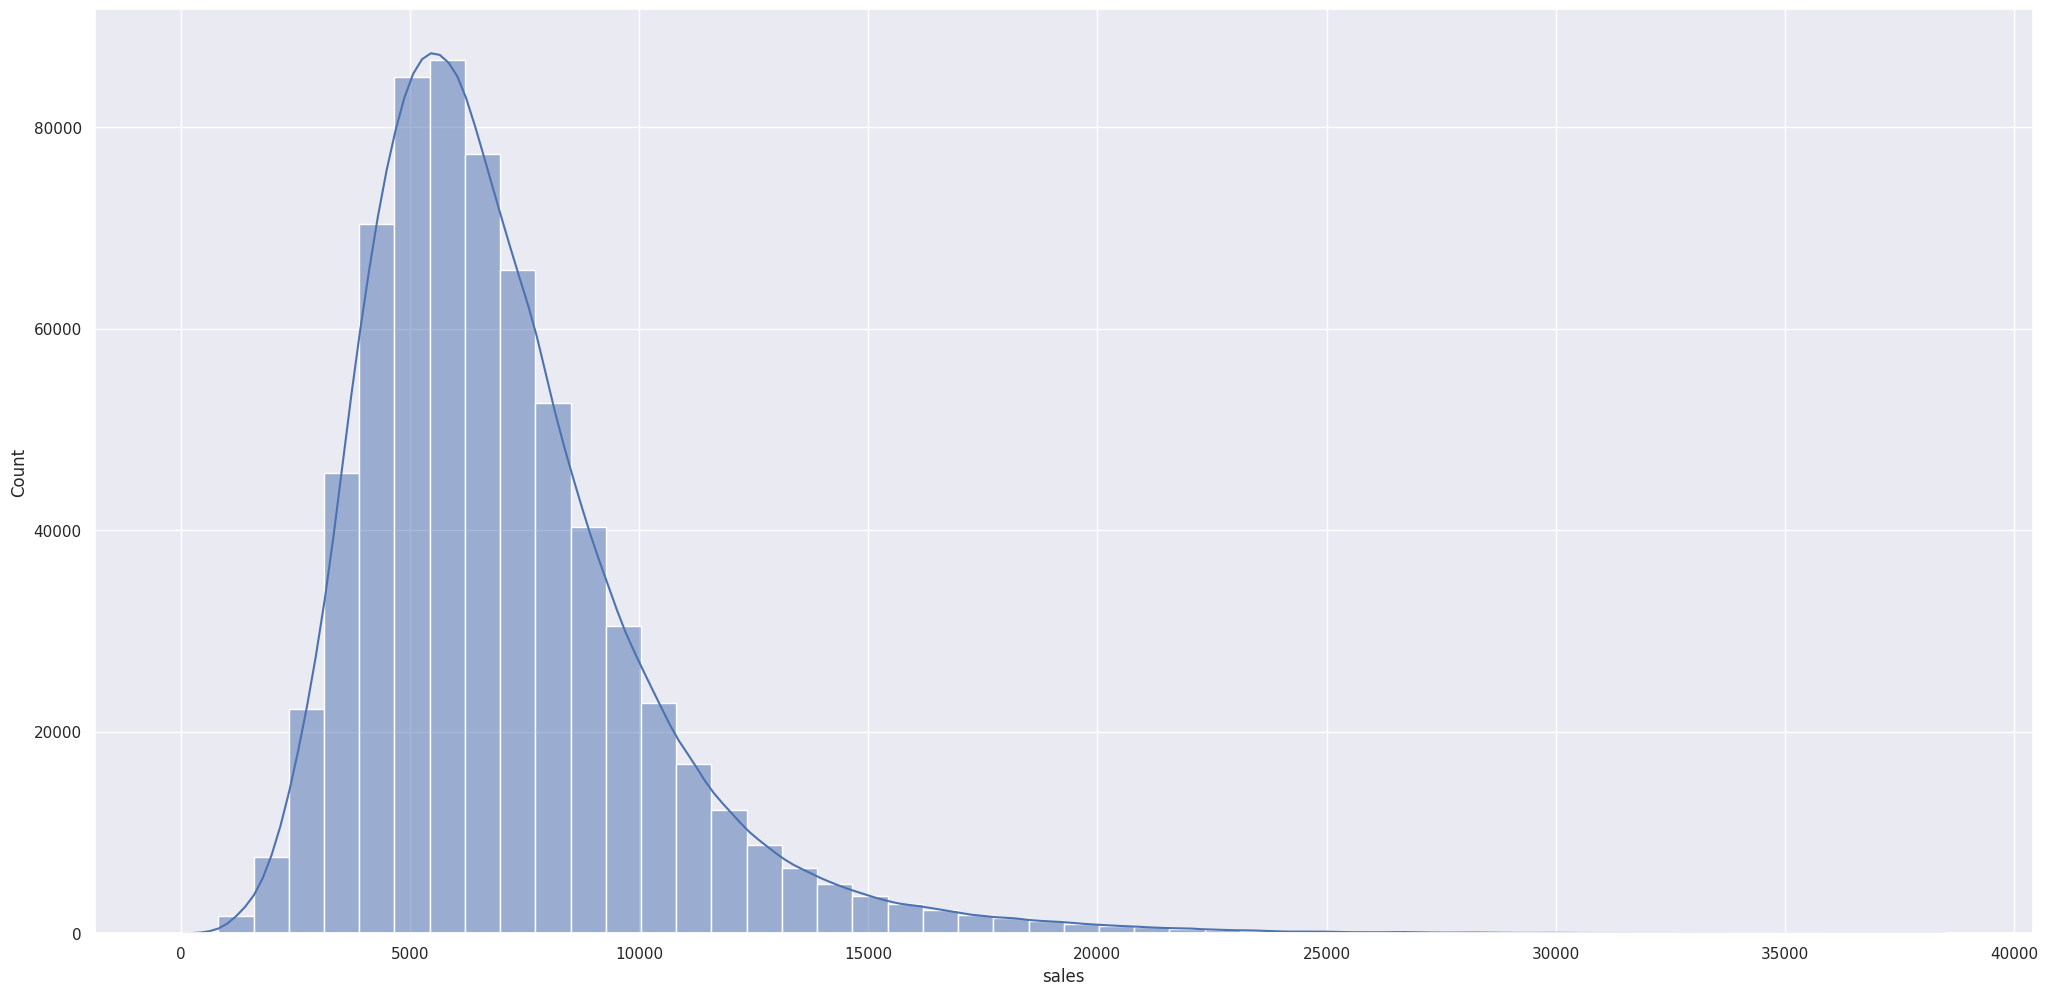

In [36]:
sns.histplot(df4['sales'], kde=True, bins=50);

### 4.1.2 - Variáveis Numéricas

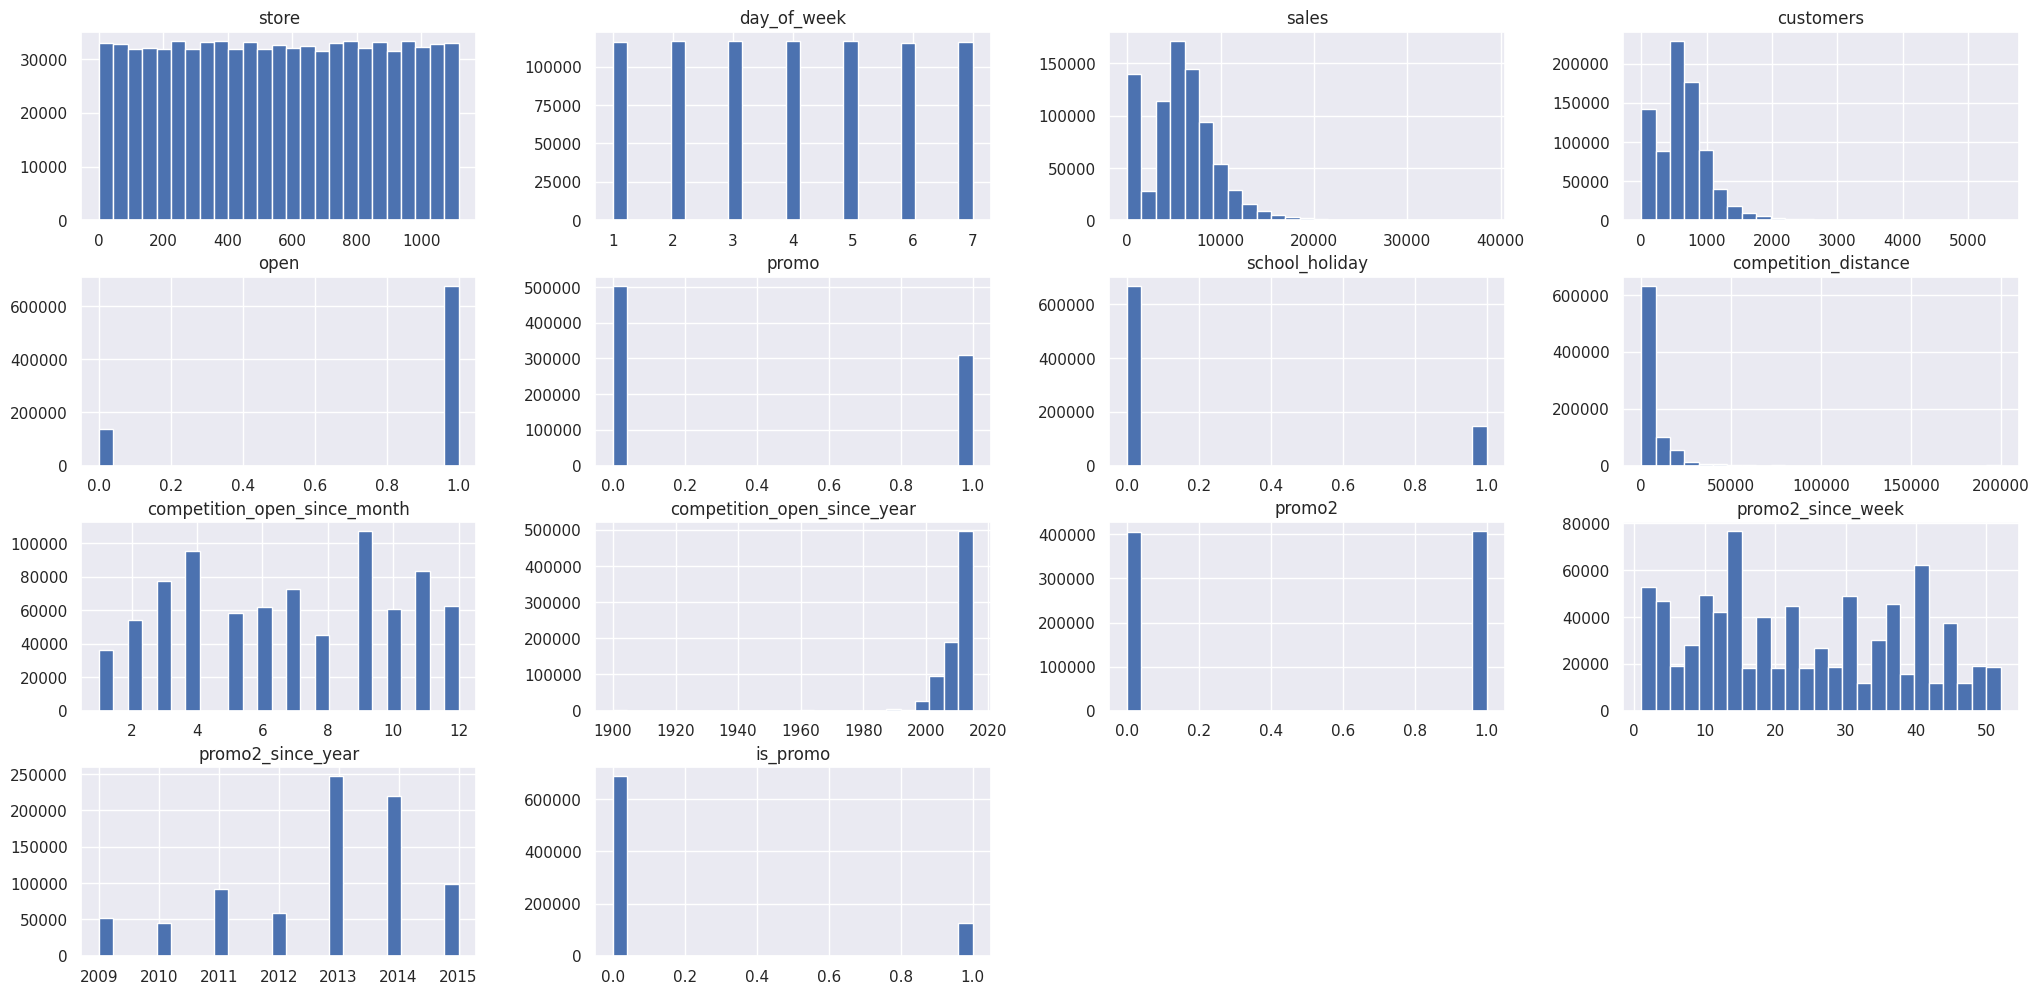

In [37]:
num_attributes.hist(bins=25);

### 4.1.3 - Variáveis Categóricas

In [38]:
df4["state_holiday"].unique()

array(['regular_day', 'public_holiday', 'christmas', 'easter_holiday'],
      dtype=object)

In [39]:
df4["store_type"].unique()

array(['d', 'c', 'a', 'b'], dtype=object)

In [40]:
df4["assortment"].unique()

array(['extended', 'basic', 'extra'], dtype=object)

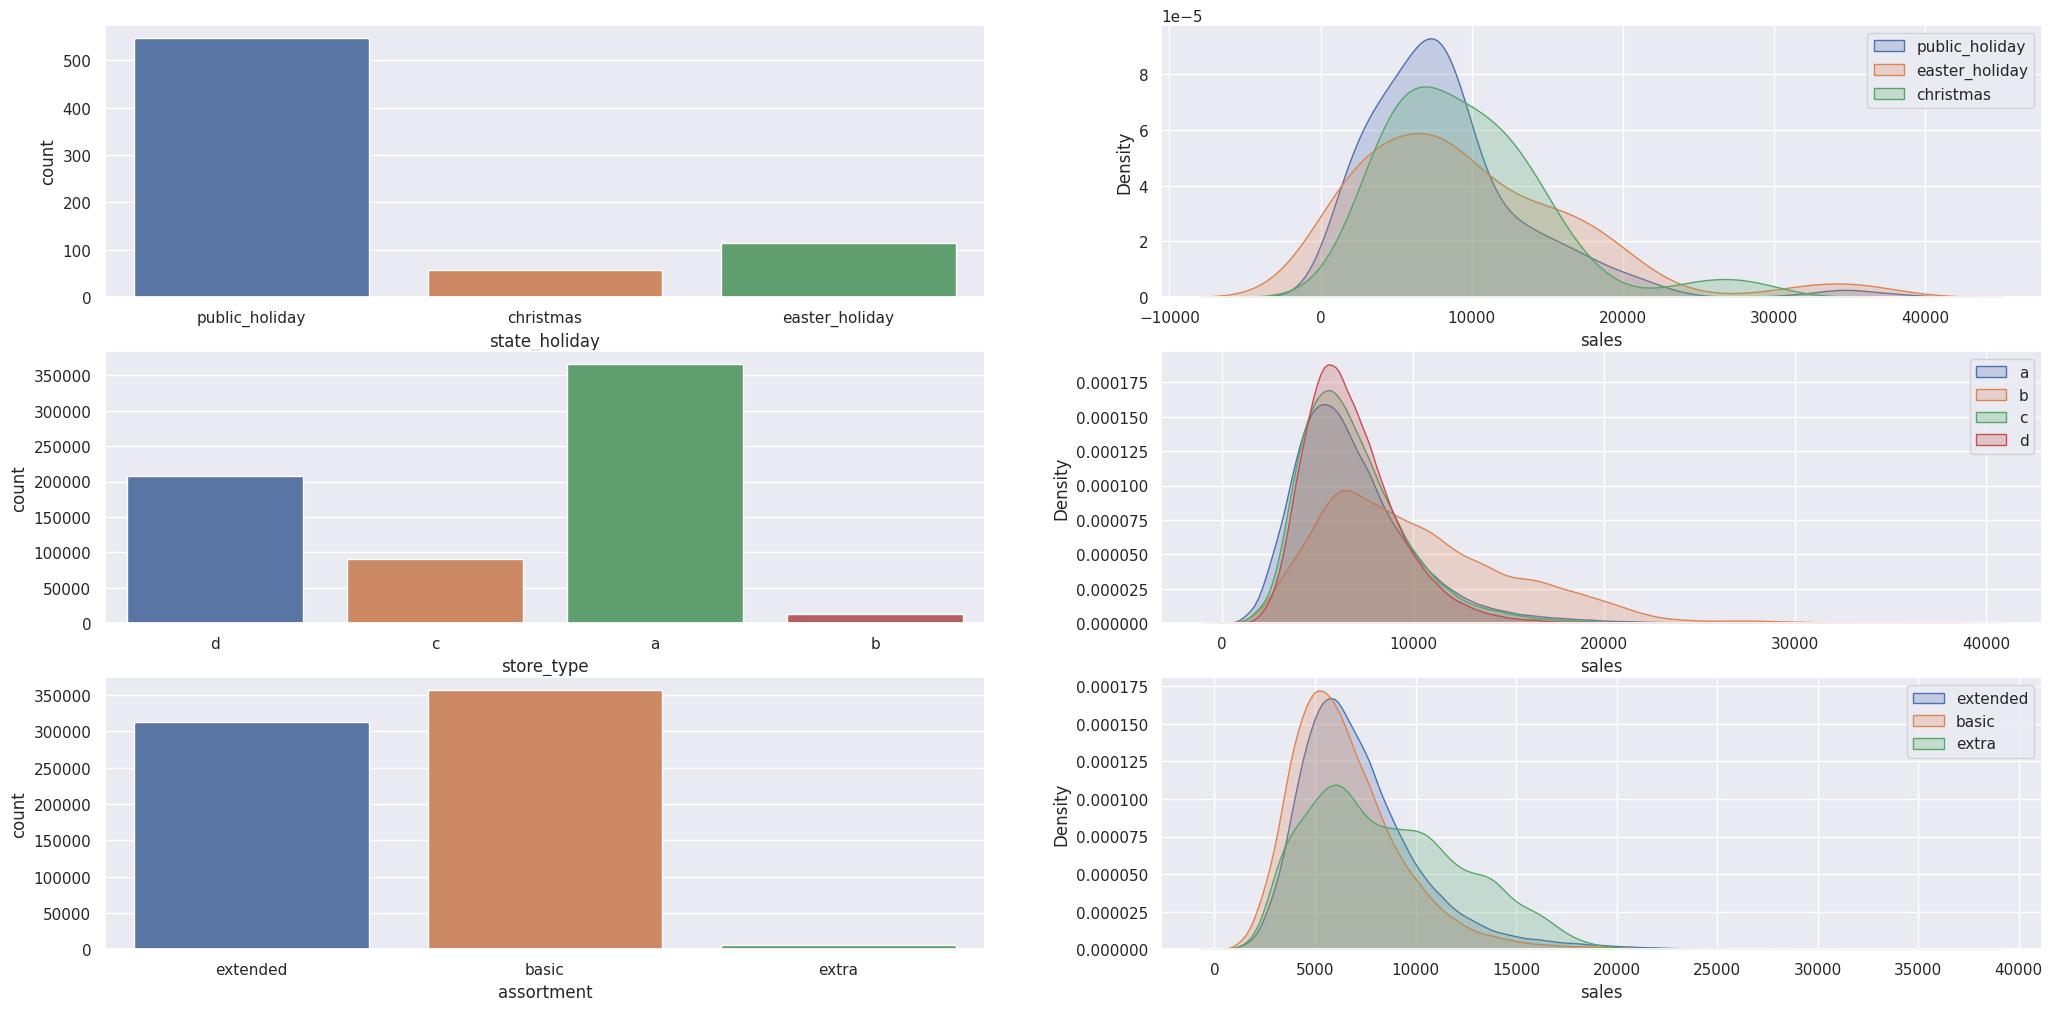

In [41]:
# state_holiday
plt.subplot(3, 2, 1)
df_aux = df4.loc[df4["state_holiday"] != "regular_day"]
sns.countplot(x=df_aux["state_holiday"])

plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill=True).legend(loc="upper right")
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', fill=True).legend(loc="upper right")
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', fill=True).legend(loc="upper right")

# store_type
plt.subplot(3, 2, 3)
sns.countplot(x=df4["store_type"])

plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', fill=True).legend(loc="upper right")
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', fill=True).legend(loc="upper right")
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', fill=True).legend(loc="upper right")
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', fill=True).legend(loc="upper right")

# assortment
plt.subplot(3, 2, 5)
sns.countplot(x=df4["assortment"])

plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', fill=True).legend(loc="upper right")
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', fill=True).legend(loc="upper right")
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', fill=True).legend(loc="upper right")

## 4.2 - Análise Bivariada

### **H1.** Lojas com maior sortimentos deveriam vender mais.  
**FALSA** Lojas com **MAIOR SORTIMENTO** vendem **MENOS**.

<Axes: xlabel='year_week'>

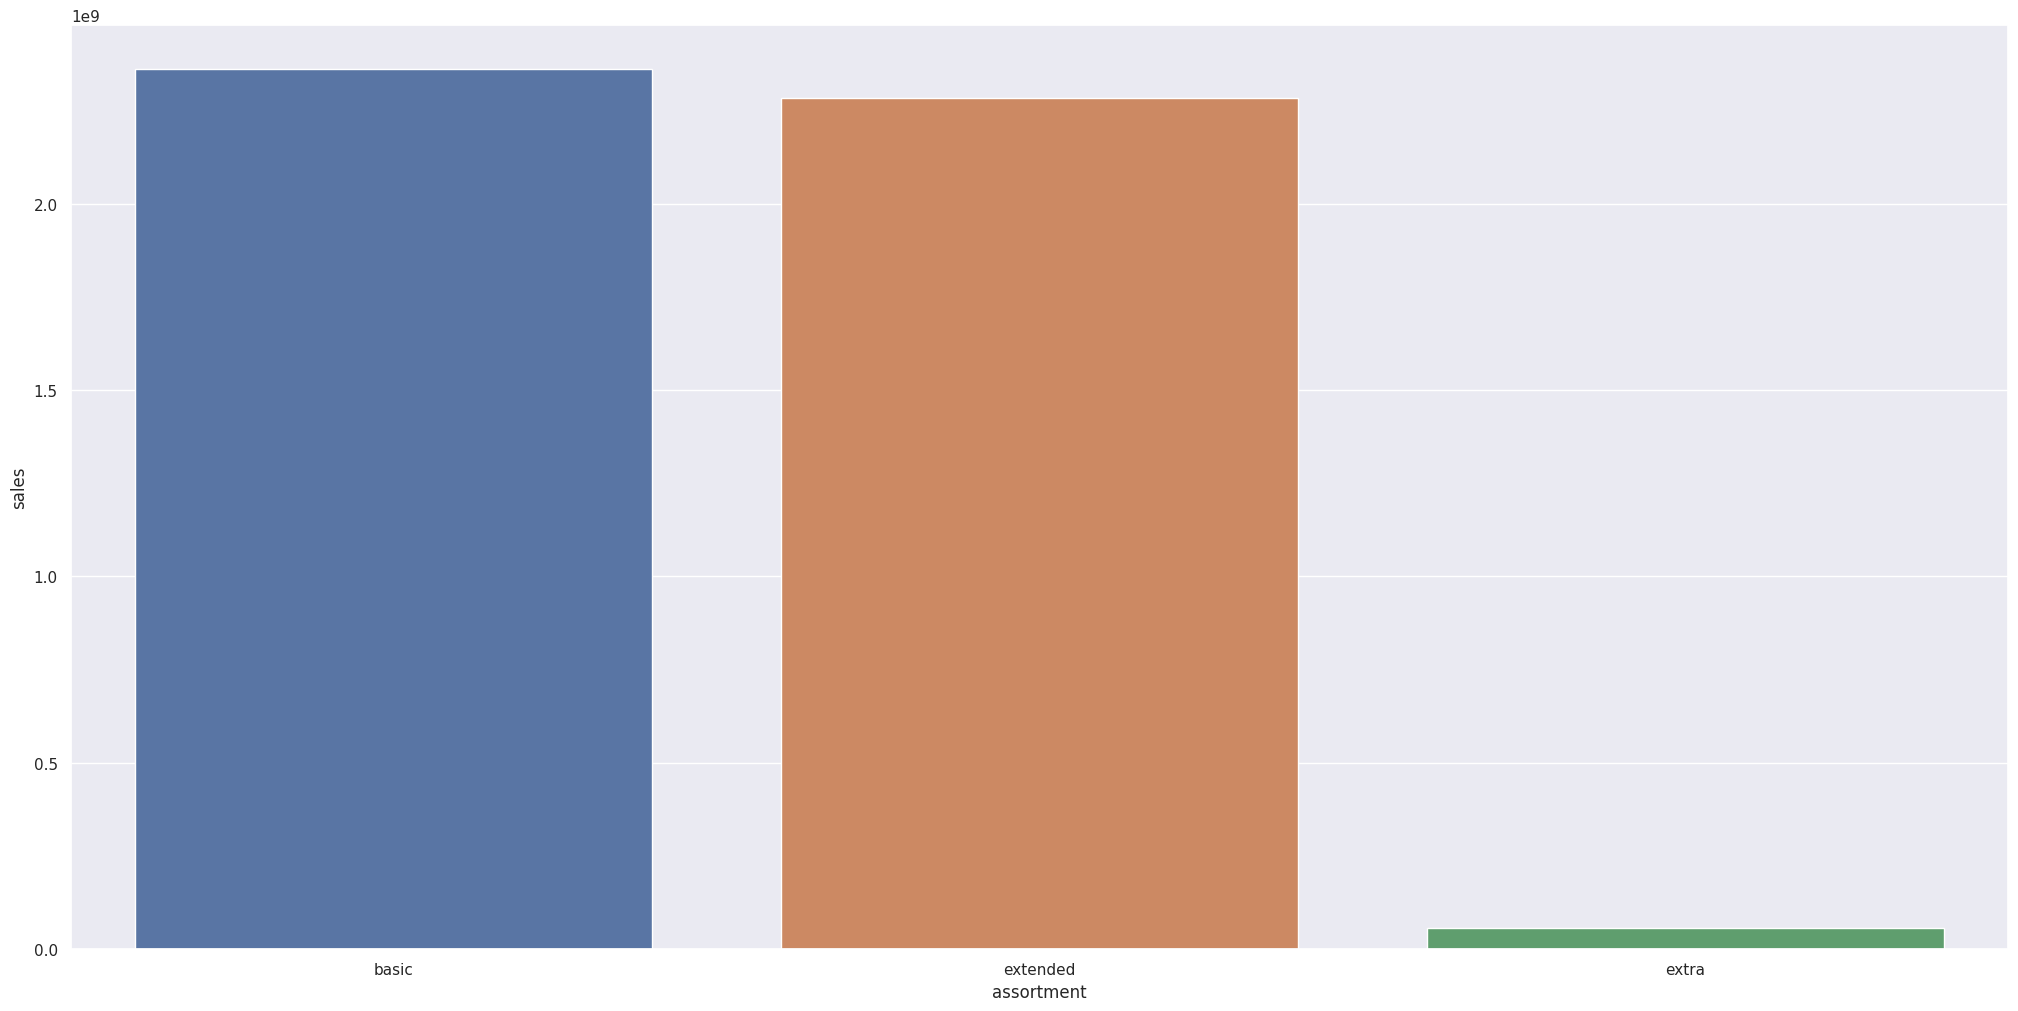

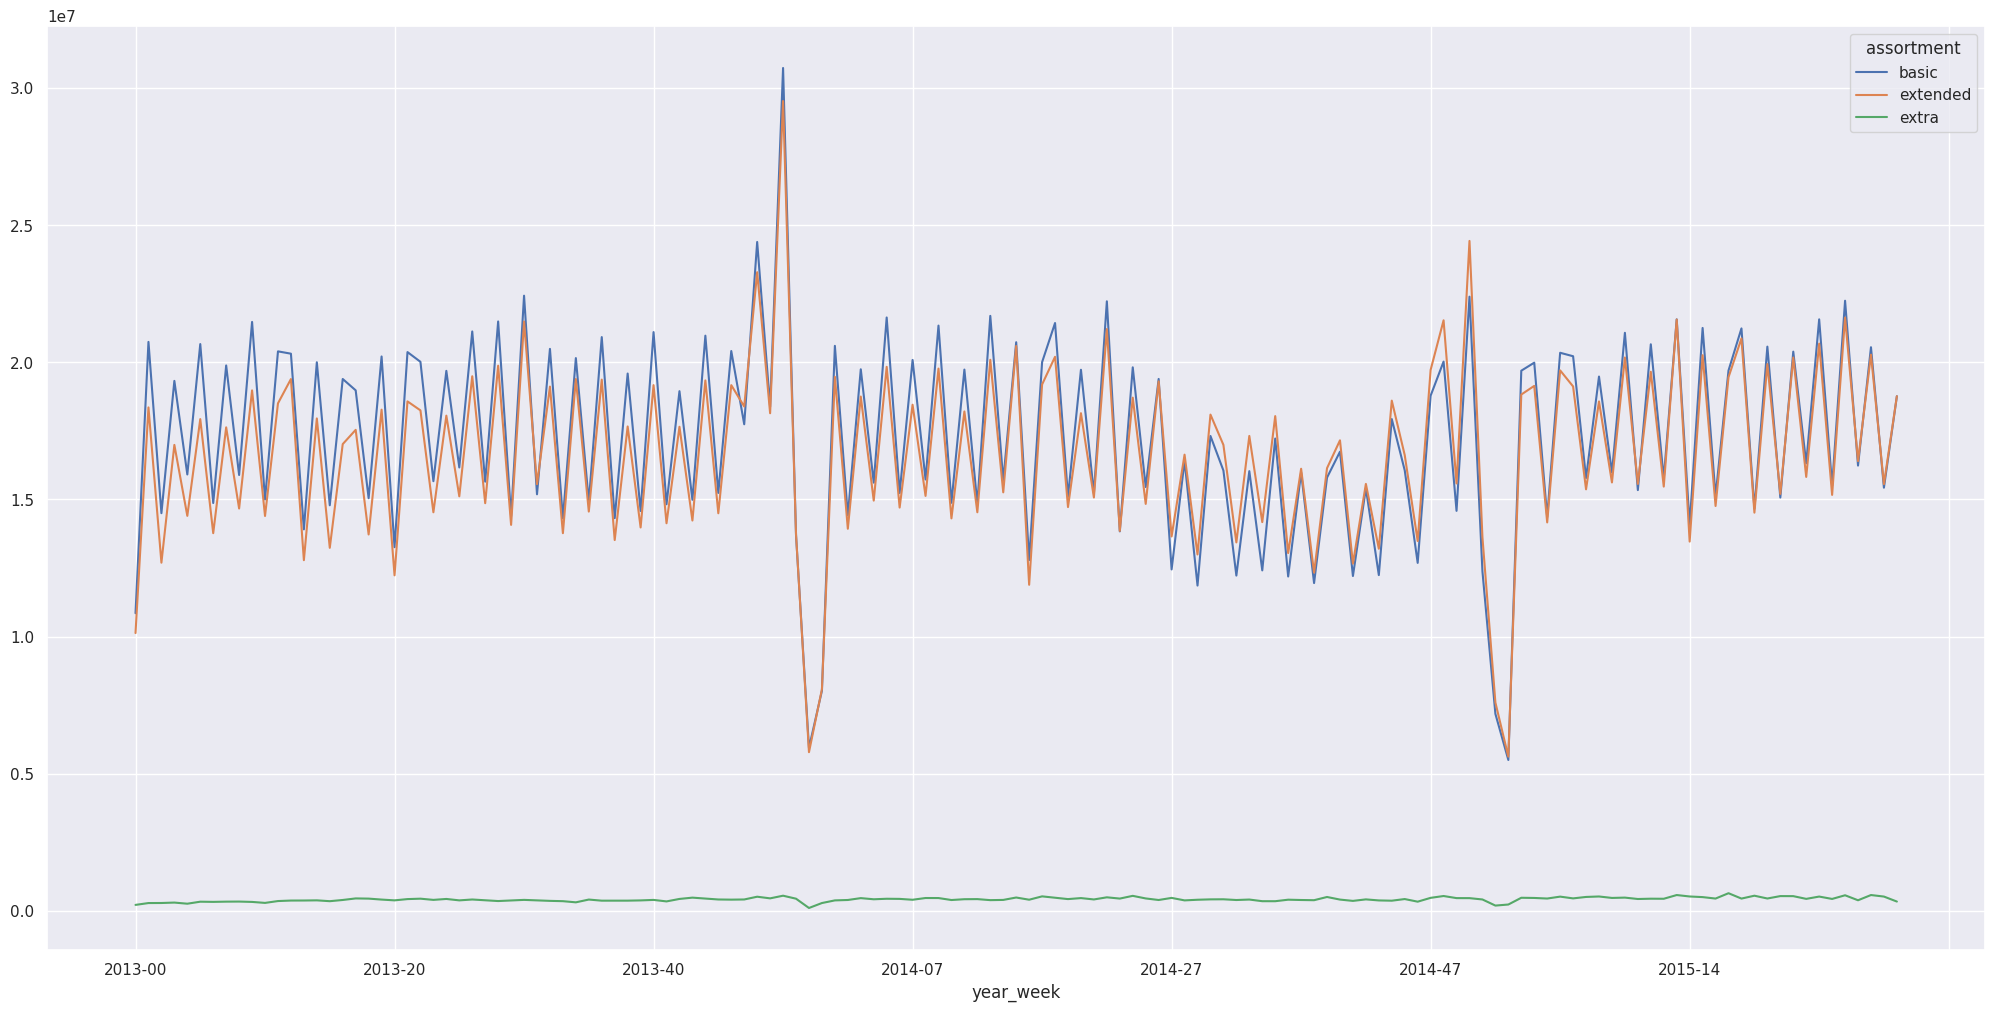

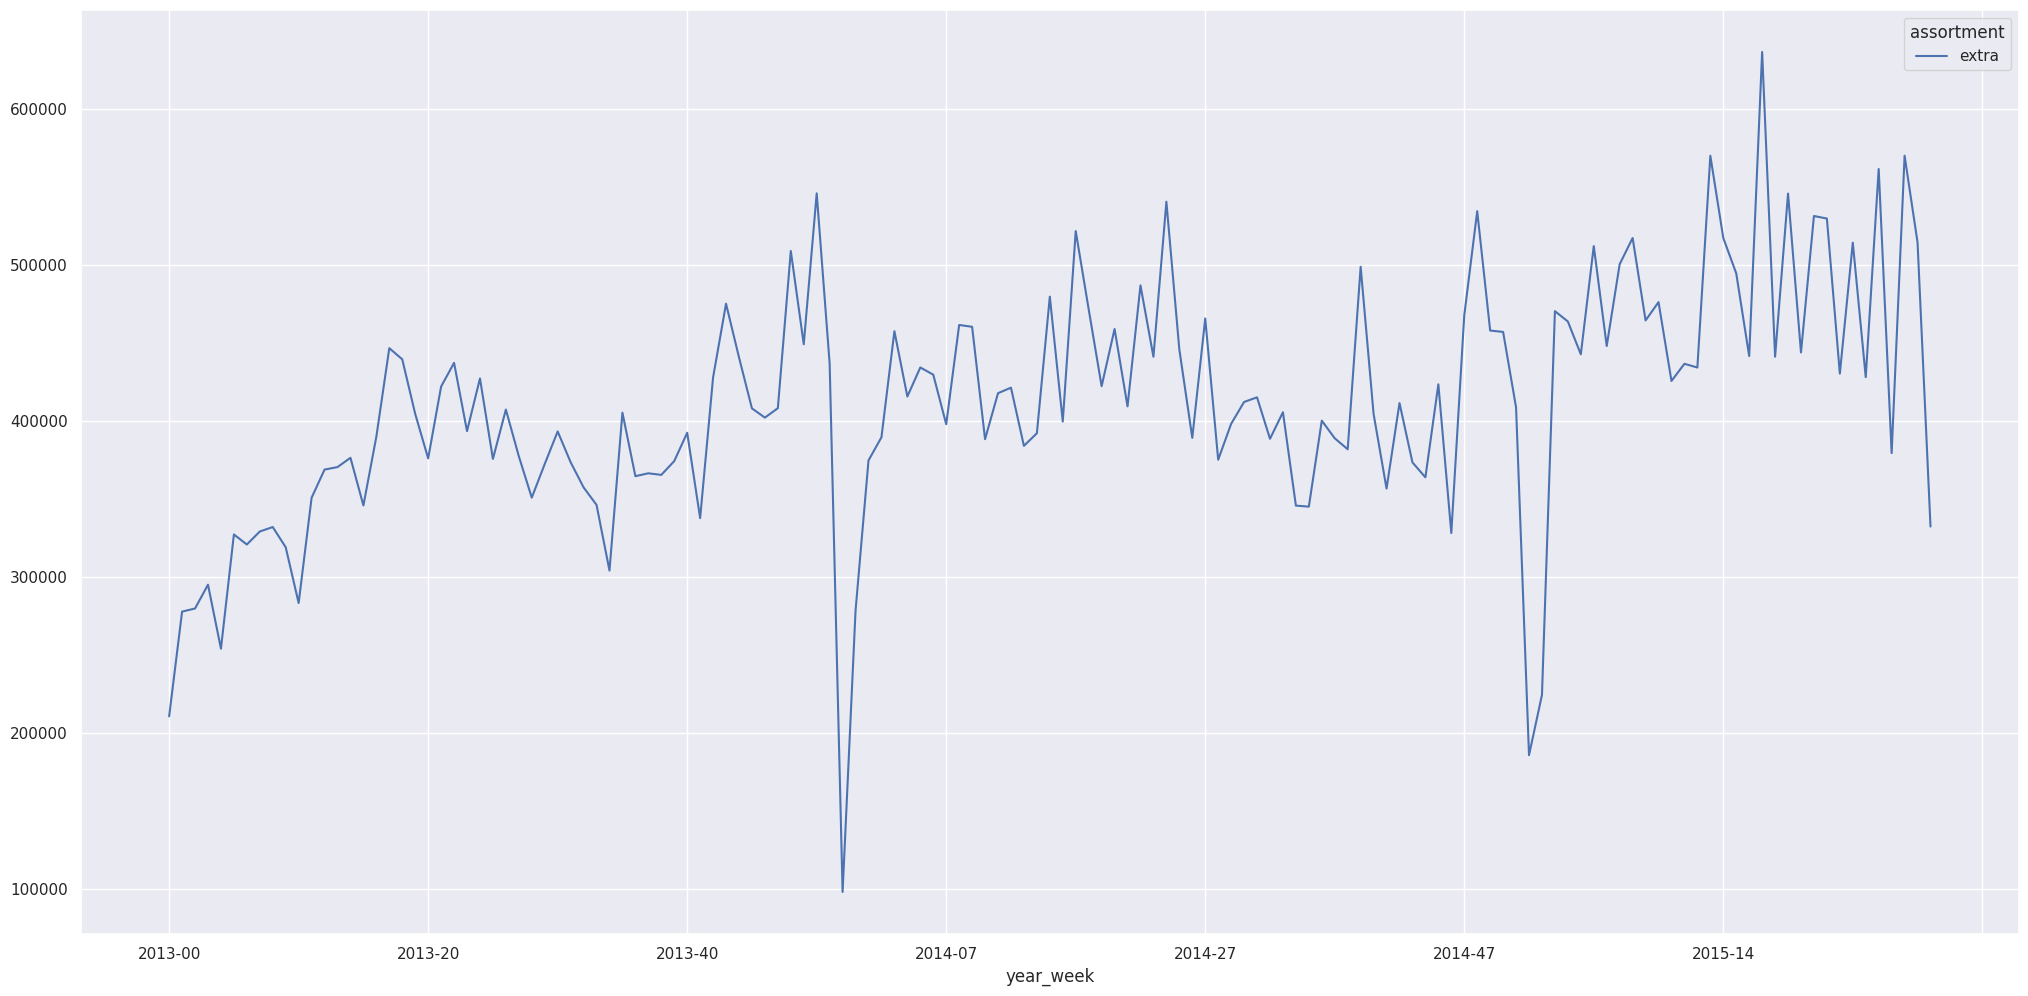

In [42]:
aux1 = df4.loc[:, ['assortment', 'sales']].groupby(['assortment']).sum().reset_index()
sns.barplot(x="assortment", y="sales", data=aux1)

aux2 = df4.loc[:, ['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot()

aux3 = aux2.loc[aux2['assortment'] == 'extra',:]
aux3.pivot(index='year_week', columns='assortment', values='sales').plot()

### **H2.** Lojas com competidores mais próximos deveriam vender menos.  
**FALSA** Lojas com **COMPETIDORES MAIS PRÓXIMOS** vendem **MAIS**.

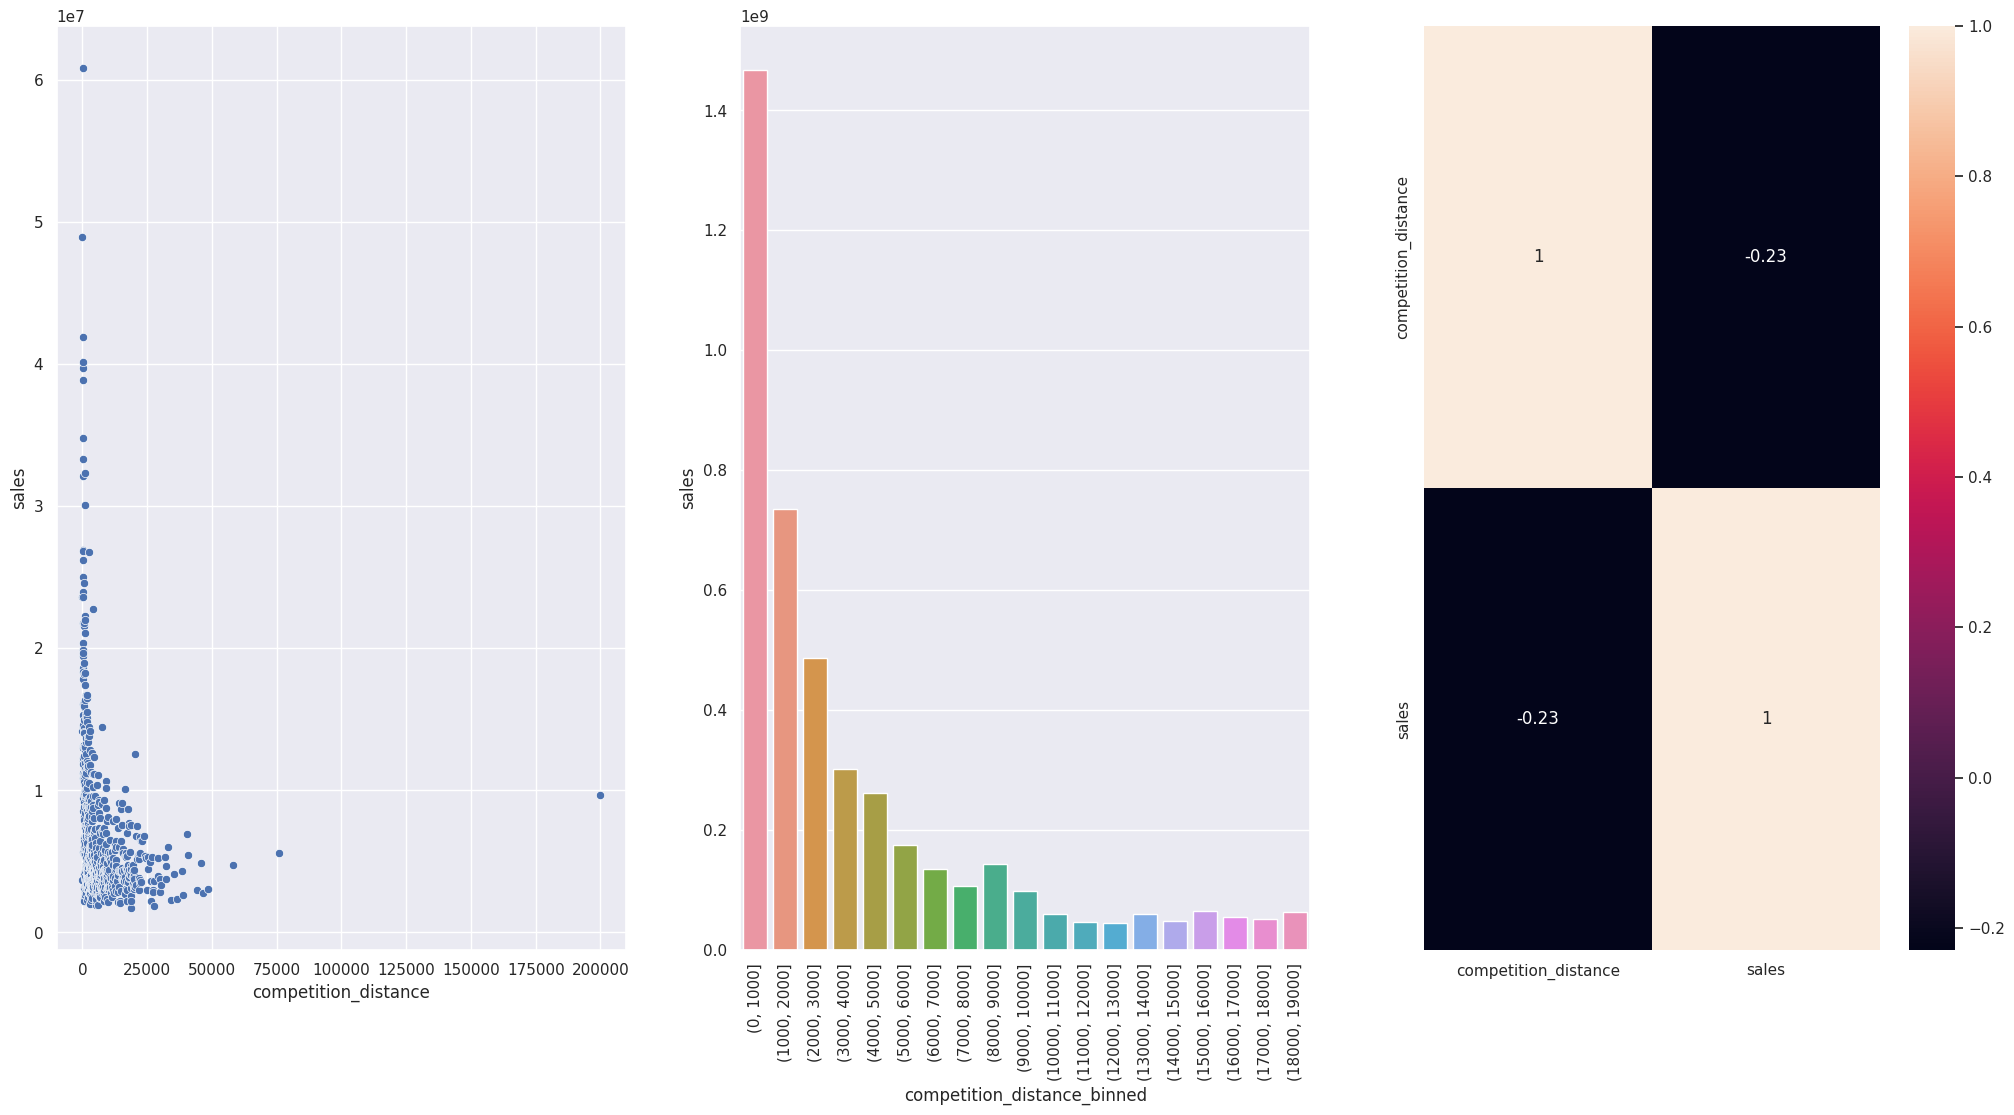

In [56]:
aux1 = df4.loc[:, ["competition_distance", "sales"]].groupby(['competition_distance']).sum().reset_index()

plt.subplot(1, 3, 1)
sns.scatterplot(x="competition_distance", y="sales", data=aux1)

plt.subplot(1, 3, 2)
bins = list(np.arange(0, 20000, 1000))
aux2 = aux1.copy()
aux2["competition_distance_binned"] = pd.cut(aux1["competition_distance"], bins=bins)
aux3 = aux2.loc[:, ["competition_distance_binned", "sales"]].groupby(['competition_distance_binned']).sum().reset_index()
sns.barplot(x="competition_distance_binned", y="sales", data=aux3);
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method="pearson"), annot=True);

### **H3.** Lojas com competidores à mais tempo deveriam vendem mais.  
**FALSA** Lojas com **COMPETIDORES À MAIS TEMPO** vendem **MENOS**.

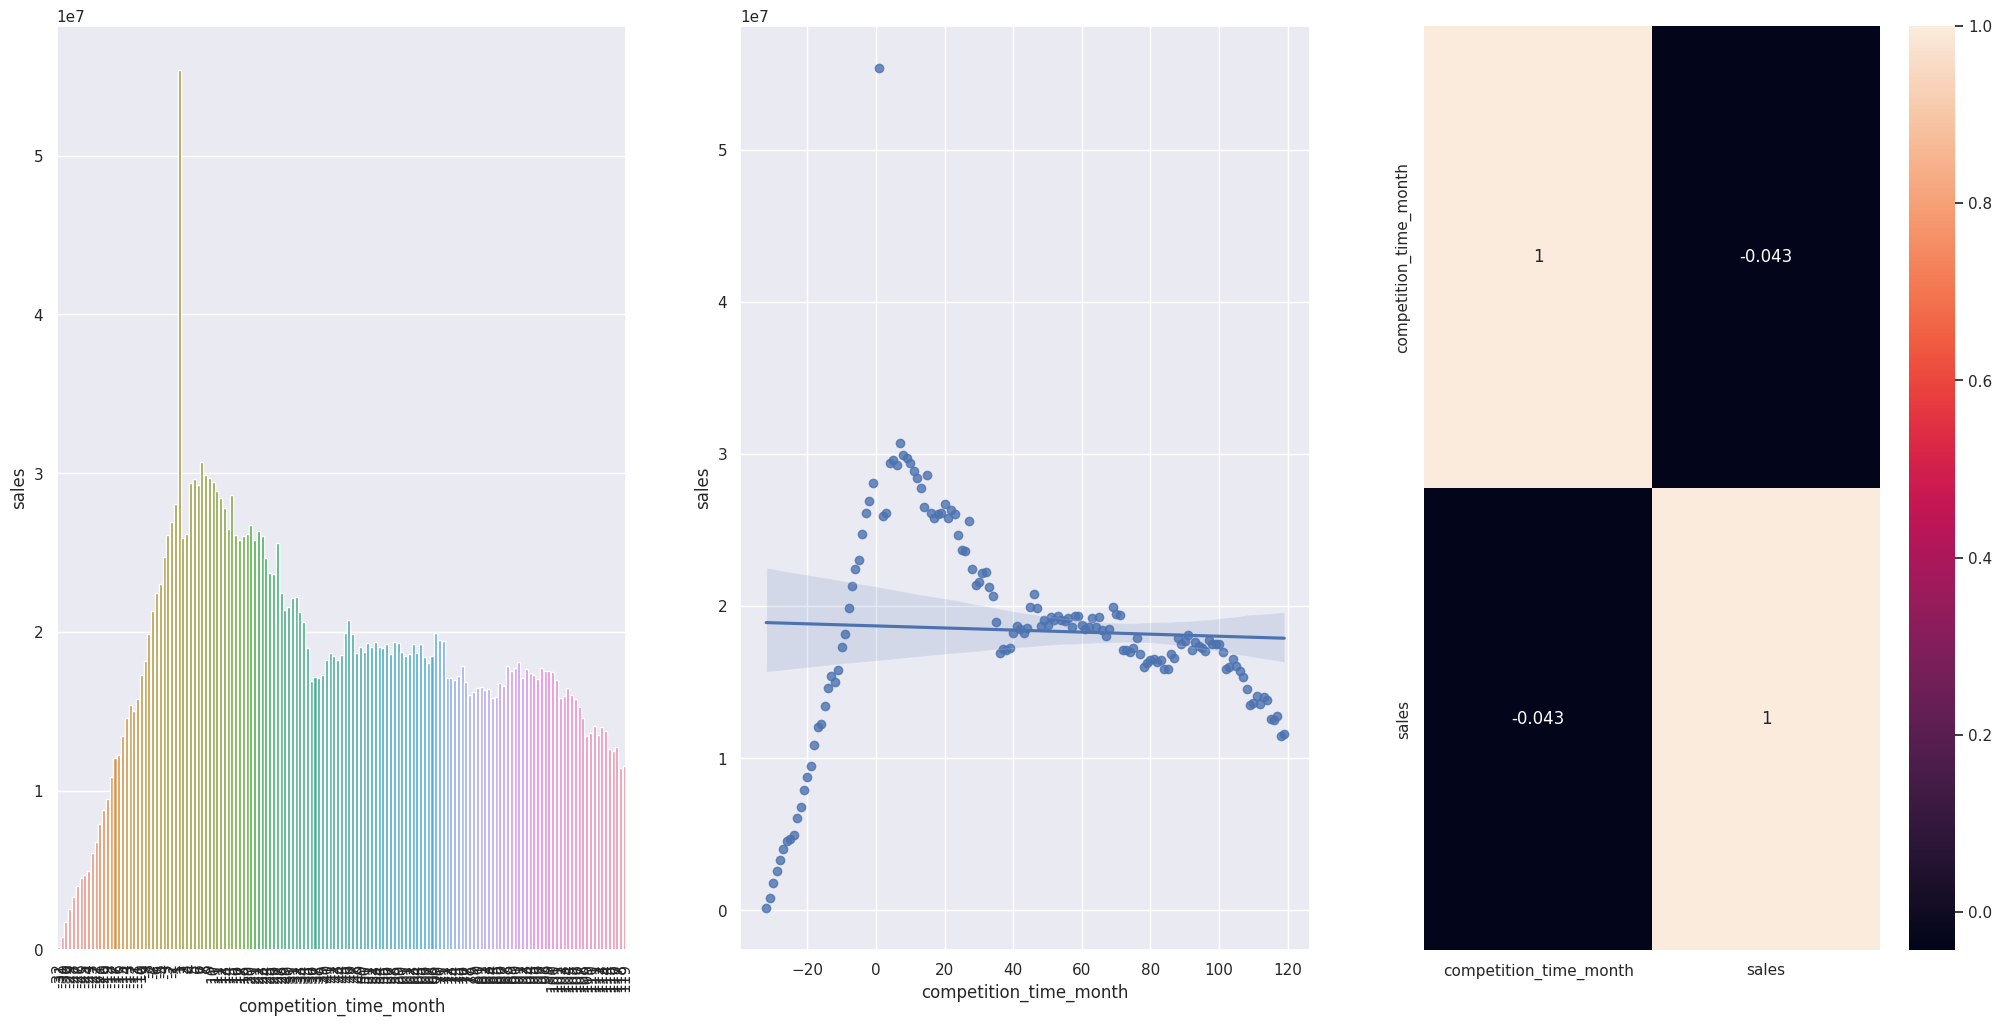

In [66]:
plt.subplot(1, 3, 1)
aux1 = df4.loc[:, ['competition_time_month', 'sales']].groupby(['competition_time_month']).sum().reset_index()
aux2 = aux1.loc[(aux1['competition_time_month'] < 120) & (aux1["competition_time_month"] != 0), :]
sns.barplot(x='competition_time_month', y='sales', data=aux2);
plt.xticks(rotation=90);

plt.subplot(1, 3, 2)
sns.regplot(x='competition_time_month', y='sales', data=aux2)

plt.subplot(1, 3, 3)
sns.heatmap(aux2.corr(method="pearson"), annot=True);

## 4.3 - Análise Multivariada